In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd

#Louisville traffic stop data
c=pd.read_csv("CSVs/LMPD_STOPS_DATA.csv",low_memory=False)
#Fayetteville traffic stop data
d=pd.read_csv("CSVs/Traffic_Stops.csv")

print(c[['ACTIVITY_DATE', 'ACTIVITY RESULTS']])
print(d[['stopdate', 'eDesc']])

set1Months = []
set1StopResults = []
set2Months = []
set2StopResults = []

for i in c['ACTIVITY_DATE']:
    date = i.split("/")
    month = date[0]
    set1Months.append(month)
    #if re.match("1[0-2]", month):
    #    set1Months.append(month)
    #else:
    #    set1Months.append("0" + month)

for i in c['ACTIVITY RESULTS']:
    if re.search(r'^C', i):
        set1StopResults.append("C")
    else:
        set1StopResults.append("W")

for i in d['stopdate']:
    month = i.split("/")
    set2Months.append(month[1])

for i in d['eDesc']:
    if re.search(r'^C', i):
        set2StopResults.append("C")
    else:
        set2StopResults.append("W")

set1Months.sort()



C:\Users\priya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


       ACTIVITY_DATE ACTIVITY RESULTS
0         04/21/2018          WARNING
1         07/04/2009  CITATION ISSUED
2         05/26/2018  CITATION ISSUED
3         09/02/2009  CITATION ISSUED
4         02/10/2016  CITATION ISSUED
...              ...              ...
431086    06/19/2014  CITATION ISSUED
431087    05/16/2012  CITATION ISSUED
431088    10/19/2014          WARNING
431089    12/19/2009  CITATION ISSUED
431090    02/20/2012  CITATION ISSUED

[431091 rows x 2 columns]
                      stopdate            eDesc
0       2016/01/01 05:07:49+00  CITATION ISSUED
1       2016/01/01 06:48:02+00  CITATION ISSUED
2       2016/01/01 06:22:19+00  WRITTEN WARNING
3       2016/01/01 08:45:07+00  CITATION ISSUED
4       2016/01/01 08:42:48+00  CITATION ISSUED
...                        ...              ...
257895  2022/04/14 04:05:43+00  WRITTEN WARNING
257896  2022/04/15 07:35:59+00  CITATION ISSUED
257897  2022/04/15 07:07:28+00  CITATION ISSUED
257898  2022/04/15 07:49:00+00  CITAT

In [7]:
d['race'].value_counts()

B     145650
W     102927
A       5700
I       2340
U       1283
Name: race, dtype: int64

In [8]:
c['DRIVER_RACE'].value_counts()

WHITE                         293560
BLACK                         114221
HISPANIC                       17390
ASIAN                           4301
MIDDLE EASTERN DESCENT           568
ASIAN/PACIFIC ISLANDER           375
AMERICAN INDIAN                  278
INDIAN/INDIA/BURMESE             196
ALASKAN NATIVE                     9
UNKNOWN                            6
INDIAN/INDIA/BURMESE               1
MIDDLE EASTERN                     1
Name: DRIVER_RACE, dtype: int64

TypeError: bar() missing 1 required positional argument: 'height'

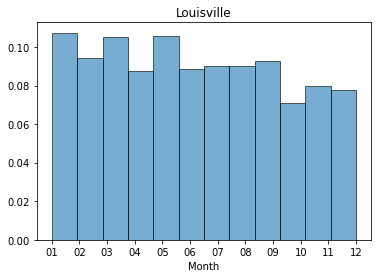

In [9]:
df = pd.DataFrame(list(zip(set1Months, set1StopResults)), columns=['Month', 'Results'])
plt.title('Louisville')
plt.xlabel('Month')


plt.hist(df['Month'], bins=12, density=True, edgecolor='black', alpha=0.6)
plt.bar(['Month', 'Results'])


plt.show()

## Gender


In [10]:
count1=list(c['DRIVER_GENDER'].value_counts())
count1=[count1[x] for x in [0,1]]
count2=list(d['sex'].value_counts())
count2=[count2[x] for x in [0,1]]
combined_count= [count1[i] + count2[i] for i in range(len(count1))]

In [11]:
#plot for db1

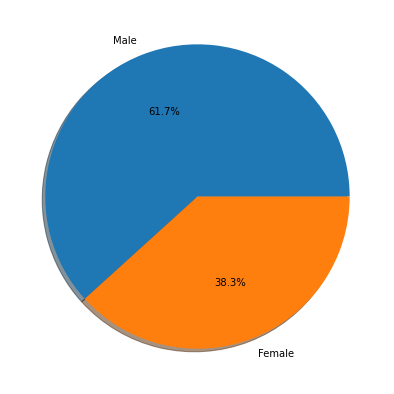

In [12]:
fig = plt.figure(figsize =(10, 7))

genders=['Male','Female']
plt.pie(count1,labels=genders,autopct='%1.1f%%', shadow=True)
 
# show plot
plt.show()

In [13]:
#plot for db2

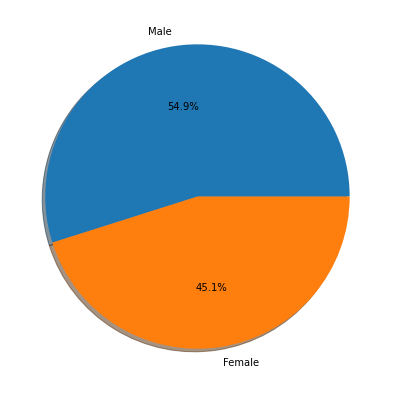

In [14]:
fig = plt.figure(figsize =(10, 7))
genders=['Male','Female']
plt.pie(count2,labels=genders,autopct='%1.1f%%', shadow=True)
 
# show plot
plt.show()

In [15]:
#combined

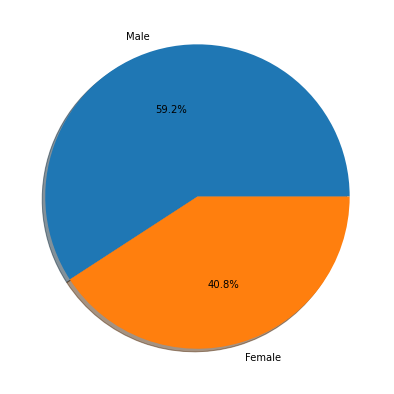

In [16]:
fig = plt.figure(figsize =(10, 7))

genders=['Male','Female']
plt.pie(combined_count,labels=genders,autopct='%1.1f%%', shadow=True)
 
# show plot
plt.show()

In [17]:
#We can see that approximately 41% of the stops are of women drivers, and 59% are of men.

## Age

In [18]:
c['DRIVER_AGE_RANGE'].value_counts()

31 - 40     101811
20 - 25      85859
41 - 50      73402
26 - 30      66153
51 - 60      48432
16 - 19      28945
OVER 60      26228
UNDER 16       221
Name: DRIVER_AGE_RANGE, dtype: int64

In [19]:
c1= c[c['DRIVER_AGE_RANGE'].notnull()]
age=[]
for i in c1['DRIVER_AGE_RANGE']:
    if i==('UNDER 16'):
        age.append(15)
    elif i==('OVER 60'):
        age.append(61)
    else:
        x= str(i).split(" - ")
        x1=(int(x[0])+int(x[1]))/2
        age.append(x1)
   
        

    

In [20]:
#dataset1

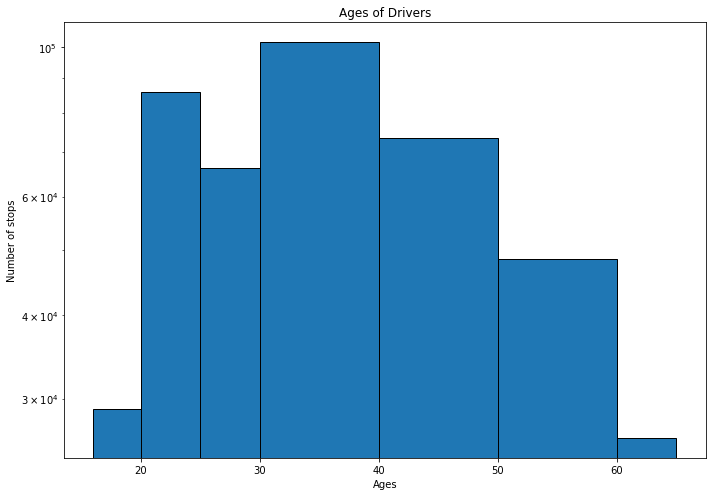

In [21]:

fig = plt.figure(figsize =(10, 7))
bins = [16,20,25,30,40,50,60,65]

plt.hist(age, bins=bins, edgecolor='black', log=True)
color = '#fc4f30'


plt.title('Ages of Drivers')
plt.xlabel('Ages')
plt.ylabel('Number of stops')

plt.tight_layout()

plt.show()

In [22]:
#dataset2

In [23]:
d['age'].unique()

array([28, 33, 24, 36, 42, 25, 18, 37, 76, 54, 19, 35, 23, 20, 49, 32, 61,
       29, 26, 39, 34, 57, 44, 63, 22, 40, 59, 30, 27, 52, 69, 51, 53, 31,
       21, 71, 17, 75, 58, 50, 78, 47, 73, 45, 66, 77, 43, 82, 41, 55, 80,
       48, 46, 64, 56, 16, 74, 60, 67, 72, 38, 70, 62, 68, 65,  2, 85, 90,
       87, 79, 97, 83, 84, 92, 86,  3,  8, 12, 15, 81, 13,  1, 10,  5, 88,
       14, 95, 89,  4,  6,  7,  9, 91, 11, 94, 93, 99, 98, 96],
      dtype=int64)

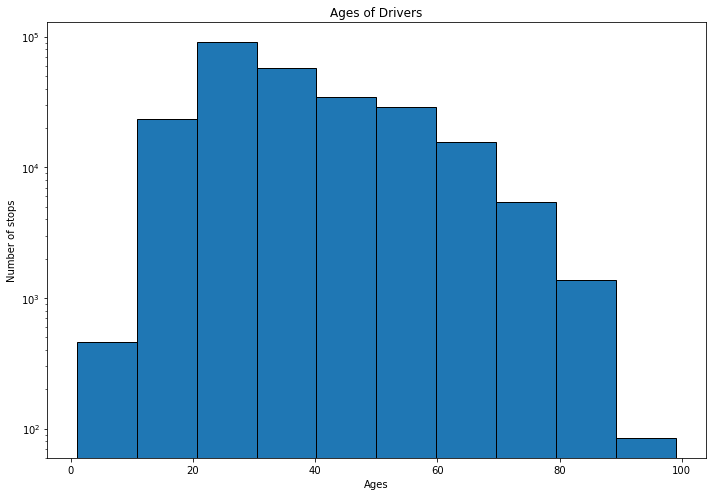

In [24]:
fig = plt.figure(figsize =(10, 7))
bins = [16,20,25,30,40,50,60,65]

plt.hist(d['age'], edgecolor='black', log=True)
color = '#fc4f30'


plt.title('Ages of Drivers')
plt.xlabel('Ages')
plt.ylabel('Number of stops')

plt.tight_layout()

plt.show()

In [25]:
def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
 
    for key, value in freq.items():
        print ("% d : % d"%(key, value))
 



In [26]:
CountFrequency(age)

 17 :  28945
 45 :  73402
 55 :  48432
 35 :  101811
 22 :  85859
 61 :  26228
 28 :  66153
 15 :  221


In [27]:
d['race'].value_counts()

B     145650
W     102927
A       5700
I       2340
U       1283
Name: race, dtype: int64

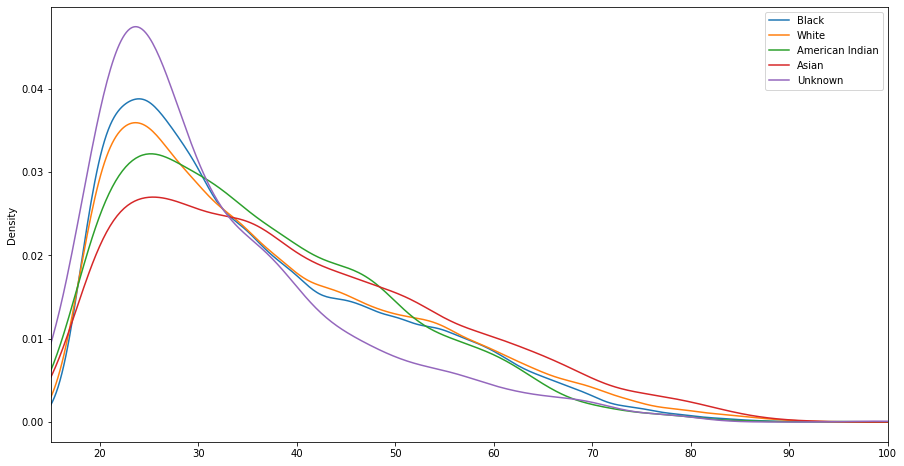

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlim(15, 100)
for race in d['race'].unique():
    s = d[d['race'] == race]['age']
    s.plot.kde(ax=ax, label=race)
ax.legend(['Black','White','American Indian','Asian','Unknown'])

## Gender(Citation vs warning)

In [29]:
#Citation vs warning for gender

In [30]:
c['DRIVER_GENDER'].value_counts()

M    266082
F    164965
          1
U         1
Name: DRIVER_GENDER, dtype: int64

In [31]:
c['ACTIVITY RESULTS'].value_counts()

CITATION ISSUED    392954
WARNING             38137
Name: ACTIVITY RESULTS, dtype: int64

In [32]:
c.drop(c.index[c['DRIVER_GENDER'] == ' '], inplace=True)
c.drop(c.index[c['DRIVER_GENDER'] == 'U'], inplace=True)

In [33]:
c['DRIVER_GENDER'].value_counts()

M    266082
F    164965
Name: DRIVER_GENDER, dtype: int64

In [34]:
d['eDesc'].value_counts()

WRITTEN WARNING    183672
CITATION ISSUED     66518
NO ACTION TAKEN      4478
ON-VIEW ARREST       3232
Name: eDesc, dtype: int64

In [35]:
d.drop(d.index[d['eDesc'] == 'NO ACTION TAKEN'], inplace=True)
d.drop(d.index[d['eDesc'] == 'ON-VIEW ARREST'], inplace=True)

In [36]:
d['eDesc'].value_counts()


WRITTEN WARNING    183672
CITATION ISSUED     66518
Name: eDesc, dtype: int64

In [37]:
race_agg = c.groupby(['DRIVER_GENDER']).apply(compute_outcome_stats)

NameError: name 'compute_outcome_stats' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
race_agg['citations_per_warning'].plot.barh(ax=axes[0], figsize=figsize, title="Citation Rate By Race")

In [ ]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['ACTIVITY RESULTS'] == 'WARNING'])
    n_citations = len(df[df['ACTIVITY RESULTS'] == 'CITATION ISSUED'])


    citations_per_warning = n_citations / n_warnings

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,

        'citations_per_warning': citations_per_warning,

    }))

In [ ]:
c.groupby('DRIVER_GENDER').apply(compute_outcome_stats)

In [ ]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['eDesc'] == 'WRITTEN WARNING'])
    n_citations = len(df[df['eDesc'] == 'CITATION ISSUED'])


    citations_per_warning = n_citations / n_warnings

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,

        'citations_per_warning': citations_per_warning,

    }))

In [ ]:
d.groupby('sex').apply(compute_outcome_stats)

# Race(Citation vs warning)

In [38]:
c1['DRIVER_RACE'].value_counts()

WHITE                         293540
BLACK                         114211
HISPANIC                       17387
ASIAN                           4301
MIDDLE EASTERN DESCENT           568
ASIAN/PACIFIC ISLANDER           375
AMERICAN INDIAN                  278
INDIAN/INDIA/BURMESE             196
ALASKAN NATIVE                     9
UNKNOWN                            6
INDIAN/INDIA/BURMESE               1
MIDDLE EASTERN                     1
Name: DRIVER_RACE, dtype: int64

In [39]:
d['race'].value_counts()

B     140966
W     100166
A       5568
I       2251
U       1239
Name: race, dtype: int64

## Logistic Regression

# DATASET1

In [40]:
import pandas as pd
import numpy as np
df=pd.read_csv("CSVs/LMPD_STOPS_DATA.csv",low_memory=False)

In [41]:
df.head()

,TYPE_OF_STOP,CITATION_CONTROL_NUMBER,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_LOCATION,ACTIVITY_DIVISION,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,WAS_VEHCILE_SEARCHED,REASON_FOR_SEARCH
0,TRAFFIC VIOLATION,0,WARNING,M,WHITE,21 - 30,04/21/2018,22:58:00,BARDSTOWN RD/ WOODBORNE,5TH DIVISION,BEAT 3,M,WHITE,16 - 19,4,NO,NaN
1,TRAFFIC VIOLATION,AO22527,CITATION ISSUED,M,WHITE,50 - 60,07/04/2009,09:47:00,I 0065 ...,7TH DIVISION,BEAT 6,M,WHITE,41 - 50,0,NO,
2,TRAFFIC VIOLATION,CW61363,CITATION ISSUED,M,BLACK,OVER 60,05/26/2018,23:02:00,I 0264 ...,4TH DIVISION,BEAT 4,M,BLACK,51 - 60,0,NO,NaN
3,TRAFFIC VIOLATION,AO84273,CITATION ISSUED,M,WHITE,50 - 60,09/02/2009,21:35:00,2700 BLOCK BLOCK OF CRITTENDEN DR-CHEVRON LOT,4TH DIVISION,BEAT 4,M,WHITE,31 - 40,0,NO,
4,TRAFFIC VIOLATION,N258431,CITATION ISSUED,M,BLACK,31 - 40,02/10/2016,19:15:00,POPLAR LEVEL/264,6TH DIVISION,BEAT 2,M,WHITE,41 - 50,0,NO,NaN


In [42]:
feature_cols=['OFFICER_GENDER','OFFICER_RACE','OFFICER_AGE_RANGE','ACTIVITY_DATE','ACTIVITY_TIME','DRIVER_GENDER','DRIVER_RACE','DRIVER_AGE_RANGE','NUMBER OF PASSENGERS']

In [43]:
df.drop(["TYPE_OF_STOP",'CITATION_CONTROL_NUMBER','ACTIVITY_LOCATION','ACTIVITY_DIVISION','WAS_VEHCILE_SEARCHED','REASON_FOR_SEARCH'], axis=1, inplace=True)

In [44]:
df.head()

,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,ACTIVITY_BEAT,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS
0,WARNING,M,WHITE,21 - 30,04/21/2018,22:58:00,BEAT 3,M,WHITE,16 - 19,4
1,CITATION ISSUED,M,WHITE,50 - 60,07/04/2009,09:47:00,BEAT 6,M,WHITE,41 - 50,0
2,CITATION ISSUED,M,BLACK,OVER 60,05/26/2018,23:02:00,BEAT 4,M,BLACK,51 - 60,0
3,CITATION ISSUED,M,WHITE,50 - 60,09/02/2009,21:35:00,BEAT 4,M,WHITE,31 - 40,0
4,CITATION ISSUED,M,BLACK,31 - 40,02/10/2016,19:15:00,BEAT 2,M,WHITE,41 - 50,0


In [45]:
df.drop('ACTIVITY_BEAT',axis=1,inplace=True)

In [46]:
df.head()

,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS
0,WARNING,M,WHITE,21 - 30,04/21/2018,22:58:00,M,WHITE,16 - 19,4
1,CITATION ISSUED,M,WHITE,50 - 60,07/04/2009,09:47:00,M,WHITE,41 - 50,0
2,CITATION ISSUED,M,BLACK,OVER 60,05/26/2018,23:02:00,M,BLACK,51 - 60,0
3,CITATION ISSUED,M,WHITE,50 - 60,09/02/2009,21:35:00,M,WHITE,31 - 40,0
4,CITATION ISSUED,M,BLACK,31 - 40,02/10/2016,19:15:00,M,WHITE,41 - 50,0


In [47]:
df=df.dropna()

In [48]:
df['OFFICER_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [49]:
df['OFFICER_GENDER'].value_counts()

M    407441
F     18374
Name: OFFICER_GENDER, dtype: int64

In [50]:
df['OFFICER_RACE'].unique()

array(['WHITE', 'BLACK', 'ASIAN', 'HISPANIC', 'UNKNOWN'], dtype=object)

In [51]:
df['OFFICER_RACE'].value_counts()

WHITE       330846
BLACK        87013
ASIAN         5083
HISPANIC      2751
UNKNOWN        122
Name: OFFICER_RACE, dtype: int64

In [52]:
df['OFFICER_AGE_RANGE'].value_counts()


50 - 60    186687
40 - 50    134383
OVER 60     58394
31 - 40     42337
21 - 30      4014
Name: OFFICER_AGE_RANGE, dtype: int64

In [53]:
df['DRIVER_RACE'].value_counts()

WHITE                         290679
BLACK                         112349
HISPANIC                       17133
ASIAN                           4273
MIDDLE EASTERN DESCENT           546
ASIAN/PACIFIC ISLANDER           354
AMERICAN INDIAN                  276
INDIAN/INDIA/BURMESE             190
ALASKAN NATIVE                     7
UNKNOWN                            6
INDIAN/INDIA/BURMESE               1
MIDDLE EASTERN                     1
Name: DRIVER_RACE, dtype: int64

In [54]:
c1= c[c['DRIVER_AGE_RANGE'].notnull()]
age=[]
for i in c1['DRIVER_AGE_RANGE']:
    if i==('UNDER 16'):
        age.append(15)
    elif i==('OVER 60'):
        age.append(61)
    else:
        x= str(i).split(" - ")
        x1=(int(x[0])+int(x[1]))/2
        age.append(x1)
   
        

    

In [55]:
df['DRIVER_AGE_RANGE'].unique()

array(['16 - 19', '41 - 50', '51 - 60', '31 - 40', '20 - 25', 'OVER 60',
       '26 - 30', 'UNDER 16'], dtype=object)

In [56]:
import numpy as np

In [57]:
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='31 - 40', '35', df['DRIVER_AGE_RANGE'])
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='51 - 60', '55', df['DRIVER_AGE_RANGE'])
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='41 - 50', '45', df['DRIVER_AGE_RANGE'])
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='OVER 60', '70', df['DRIVER_AGE_RANGE'])
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='20 - 25', '23', df['DRIVER_AGE_RANGE'])
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='UNDER 16', '14', df['DRIVER_AGE_RANGE'])
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='26 - 30', '27', df['DRIVER_AGE_RANGE'])
df['DRIVER_AGE_RANGE']=np.where(df['DRIVER_AGE_RANGE'] =='16 - 19', '27', df['DRIVER_AGE_RANGE'])

In [58]:
df['DRIVER_AGE_RANGE'].value_counts()


35    100606
27     93699
23     84606
45     72658
55     47978
70     26055
14       213
Name: DRIVER_AGE_RANGE, dtype: int64

In [59]:
df['OFFICER_AGE_RANGE'].value_counts()

50 - 60    186687
40 - 50    134383
OVER 60     58394
31 - 40     42337
21 - 30      4014
Name: OFFICER_AGE_RANGE, dtype: int64

In [60]:
df['OFFICER_AGE_RANGE']=np.where(df['OFFICER_AGE_RANGE'] =='31 - 40', '35', df['OFFICER_AGE_RANGE'])
df['OFFICER_AGE_RANGE']=np.where(df['OFFICER_AGE_RANGE'] =='50 - 60', '55', df['OFFICER_AGE_RANGE'])
df['OFFICER_AGE_RANGE']=np.where(df['OFFICER_AGE_RANGE'] =='40 - 50', '45', df['OFFICER_AGE_RANGE'])

df['OFFICER_AGE_RANGE']=np.where(df['OFFICER_AGE_RANGE'] =='OVER 60', '70', df['OFFICER_AGE_RANGE'])
df['OFFICER_AGE_RANGE']=np.where(df['OFFICER_AGE_RANGE'] =='21 - 30', '25', df['OFFICER_AGE_RANGE'])


In [61]:
df['OFFICER_AGE_RANGE'].unique()

array(['25', '55', '70', '35', '45'], dtype=object)

In [62]:

import datetime
import numpy as np
dates=list(df['ACTIVITY_DATE'])
frame = pd.to_datetime(dates, dayfirst = True)
frame = pd.DataFrame([frame]).transpose()
frame['date']= frame
frame['month']= frame['date'].dt.month
frame.drop(0, axis = 1, inplace = True)
  
frame

,date,month
0,2018-04-21,4
1,2009-04-07,4
2,2018-05-26,5
3,2009-02-09,2
4,2016-10-02,10
...,...,...
425810,2014-06-19,6
425811,2012-05-16,5
425812,2014-10-19,10
425813,2009-12-19,12


In [63]:
df['Month']=frame['month']

In [64]:
df.head()

,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,Month
0,WARNING,M,WHITE,25,04/21/2018,22:58:00,M,WHITE,27,4,4.0
1,CITATION ISSUED,M,WHITE,55,07/04/2009,09:47:00,M,WHITE,45,0,4.0
2,CITATION ISSUED,M,BLACK,70,05/26/2018,23:02:00,M,BLACK,55,0,5.0
3,CITATION ISSUED,M,WHITE,55,09/02/2009,21:35:00,M,WHITE,35,0,2.0
4,CITATION ISSUED,M,BLACK,35,02/10/2016,19:15:00,M,WHITE,45,0,10.0


In [65]:
frame = pd.to_datetime(dates, dayfirst = True)
frame = pd.DataFrame([frame]).transpose()

In [66]:
frame['date']= frame
frame['month']= frame['date'].dt.day

In [67]:
df['Day']=frame['month']

In [68]:
frame['year']=frame['date'].dt.year

In [69]:
df['Year']=frame['year']

In [70]:
df.head()

,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,Month,Day,Year
0,WARNING,M,WHITE,25,04/21/2018,22:58:00,M,WHITE,27,4,4.0,21.0,2018.0
1,CITATION ISSUED,M,WHITE,55,07/04/2009,09:47:00,M,WHITE,45,0,4.0,7.0,2009.0
2,CITATION ISSUED,M,BLACK,70,05/26/2018,23:02:00,M,BLACK,55,0,5.0,26.0,2018.0
3,CITATION ISSUED,M,WHITE,55,09/02/2009,21:35:00,M,WHITE,35,0,2.0,9.0,2009.0
4,CITATION ISSUED,M,BLACK,35,02/10/2016,19:15:00,M,WHITE,45,0,10.0,2.0,2016.0


In [71]:
df.dropna(inplace=True)

In [72]:
df.Month=df.Month.astype('int64')
df.Day=df.Day.astype('int64')
df.Year=df.Year.astype('int64')

In [73]:
df.head()

,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,Month,Day,Year
0,WARNING,M,WHITE,25,04/21/2018,22:58:00,M,WHITE,27,4,4,21,2018
1,CITATION ISSUED,M,WHITE,55,07/04/2009,09:47:00,M,WHITE,45,0,4,7,2009
2,CITATION ISSUED,M,BLACK,70,05/26/2018,23:02:00,M,BLACK,55,0,5,26,2018
3,CITATION ISSUED,M,WHITE,55,09/02/2009,21:35:00,M,WHITE,35,0,2,9,2009
4,CITATION ISSUED,M,BLACK,35,02/10/2016,19:15:00,M,WHITE,45,0,10,2,2016


In [74]:
df.to_csv('new_dataframe.csv',index=False)

In [75]:
df['times']= pd.to_datetime(df['ACTIVITY_TIME'])

In [76]:
df['hour'] = df['times'].dt.hour


In [77]:
df.head()

,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,ACTIVITY_DATE,ACTIVITY_TIME,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,Month,Day,Year,times,hour
0,WARNING,M,WHITE,25,04/21/2018,22:58:00,M,WHITE,27,4,4,21,2018,2022-04-21 22:58:00,22
1,CITATION ISSUED,M,WHITE,55,07/04/2009,09:47:00,M,WHITE,45,0,4,7,2009,2022-04-21 09:47:00,9
2,CITATION ISSUED,M,BLACK,70,05/26/2018,23:02:00,M,BLACK,55,0,5,26,2018,2022-04-21 23:02:00,23
3,CITATION ISSUED,M,WHITE,55,09/02/2009,21:35:00,M,WHITE,35,0,2,9,2009,2022-04-21 21:35:00,21
4,CITATION ISSUED,M,BLACK,35,02/10/2016,19:15:00,M,WHITE,45,0,10,2,2016,2022-04-21 19:15:00,19


In [78]:
corrM = my_df.corr()
corrM

NameError: name 'my_df' is not defined

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
my_df = pd.read_csv("CSVs/LMPD_STOPS_DATA.csv")

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [ ]:
df.drop('ACTIVITY_DATE',axis=1,inplace=True)
df.drop('ACTIVITY_TIME',axis=1,inplace=True)
df.drop('times',axis=1,inplace=True)

In [ ]:
df['DRIVER_RACE'].unique()

In [ ]:
df['OFFICER_RACE'].value_counts()

In [ ]:
df.head()

In [ ]:
df['ACTIVITY RESULTS'].replace({'WARNING': 0, 'CITATION ISSUED': 1}, inplace=True)

In [ ]:
df.head()

In [ ]:
df1=pd.get_dummies(df, columns=['OFFICER_RACE','OFFICER_GENDER','DRIVER_GENDER','DRIVER_RACE'], drop_first=True,prefix="dmy")

In [ ]:
df1.head()

In [ ]:
feature_cols=['OFFICER_AGE_RANGE','DRIVER_AGE_RANGE','NUMBER OF PASSENGERS','Month','Day','hour','dmy_BLACK','dmy_HISPANIC','dmy_AMERICAN INDIAN','dmy_ASIAN','dmy_ASIAN/PACIFIC ISLANDER','dmy_BLACK','dmy_HISPANIC','dmy_INDIAN/INDIA/BURMESE','dmy_INDIAN/INDIA/BURMESE','dmy_MIDDLE EASTERN DESCENT','dmy_UNKNOWN','dmy_WHITE']

In [ ]:
X=df1[feature_cols]
y=df1['ACTIVITY RESULTS']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Specificity:",metrics.recall_score(y_test, y_pred,pos_label=0))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#class imbalance

In [ ]:
df1['ACTIVITY RESULTS'].value_counts()

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.countplot(x='ACTIVITY RESULTS',data=df1,palette='Set2')

In [ ]:
import statsmodels.api as sm

#define response variable
y = df1['ACTIVITY RESULTS']

#define predictor variables
x = df1[feature_cols]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, X.astype(float)).fit()

#view summary of model fit
print(model.summary())


In [228]:
df1.head()

,ACTIVITY RESULTS,OFFICER_AGE_RANGE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,Month,Day,Year,hour,dmy_BLACK,dmy_HISPANIC,...,dmy_AMERICAN INDIAN,dmy_ASIAN,dmy_ASIAN/PACIFIC ISLANDER,dmy_BLACK,dmy_HISPANIC,dmy_INDIAN/INDIA/BURMESE,dmy_INDIAN/INDIA/BURMESE,dmy_MIDDLE EASTERN DESCENT,dmy_UNKNOWN,dmy_WHITE
0,0,25,27,4,4,21,2018,22,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,55,45,0,4,7,2009,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,70,55,0,5,26,2018,23,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,55,35,0,2,9,2009,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35,45,0,10,2,2016,19,1,0,...,0,0,0,0,0,0,0,0,0,1


In [235]:
df.head()


,ACTIVITY RESULTS,OFFICER_GENDER,OFFICER_RACE,OFFICER_AGE_RANGE,DRIVER_GENDER,DRIVER_RACE,DRIVER_AGE_RANGE,NUMBER OF PASSENGERS,Month,Day,Year,hour
0,0,M,WHITE,25,M,WHITE,27,4,4,21,2018,22
1,1,M,WHITE,55,M,WHITE,45,0,4,7,2009,9
2,1,M,BLACK,70,M,BLACK,55,0,5,26,2018,23
3,1,M,WHITE,55,M,WHITE,35,0,2,9,2009,21
4,1,M,BLACK,35,M,WHITE,45,0,10,2,2016,19
